In [13]:
# Chargement du fichier de consommation
import pandas as pd

# Lecture du CSV (avec gestion automatique des espaces et du séparateur)
conso = pd.read_csv("Conso.csv", sep=";", skipinitialspace=True)

# Vérification des noms de colonnes
print("Colonnes disponibles :", conso.columns.tolist())
print(" ")

# Affichage de la date/heure max et min 
print("Date et heure max et min :")
print("Min Date :", conso['RTC date'].min(), conso['RTC time'].min())
print("Max Date :", conso['RTC date'].max(), conso['RTC time'].max())

print(" ")

# Affichage des valeurs max et min pour la consommation Moteur 1 et Moteur 2
print("Valeurs consommation Moteur 1 et Moteur 2 :")
print("Max Moteur 1 :", conso["Motor 1"].max())
print("Min Moteur 1 :", conso["Motor 1"].min())
print("Max Moteur 2 :", conso["Motor 2"].max())
print("Min Moteur 2 :", conso["Motor 2"].min())


Colonnes disponibles : ['RTC date', 'RTC time', 'GPS date', 'GPS time', 'Latitude', 'Longitude', 'Speed', 'Course', 'Wind_Angle', 'Wind_Speed', 'Motor 1', 'Motor 2']
 
Date et heure max et min :
Min Date : 01/05/2021 00:00:00
Max Date : 31/05/2021 23:59:59
 
Valeurs consommation Moteur 1 et Moteur 2 :
Max Moteur 1 : 9,9872
Min Moteur 1 : -6,42949583
Max Moteur 2 : 9,9851
Min Moteur 2 : -8,429495996


In [14]:
#Chargement du fichier 
import pandas as pd 

# Lecture du CSV (avec gestion automatique des espaces et du séparateur)
assi = pd.read_excel("Assistance.xlsx")

# Vérification des noms de colonnes
print("Colonnes disponibles :", assi.columns.tolist())

print(" ")

# Calcul des valeurs min et max pour les colonnes numériques et datetime
for column in assi.select_dtypes(include=['number', 'datetime']):
    print(f"Colonne: {column}")
    print(f"  Min: {assi[column].min()}")
    print(f"  Max: {assi[column].max()}")
    print(" ")

Colonnes disponibles : ['Assistance No.', 'Job No.', 'Vessel', 'Description', 'Vessel Name', 'Job', 'Departure', 'Arrival', 'Start Mobilisation', 'Ordered', 'On Site', 'Start Job', 'End Job', 'End Mobilisation', 'Assistant Hrs', 'Running Hrs.', 'Time Registration', 'Used Configuration', 'Comments']
 
Colonne: Start Mobilisation
  Min: 2021-01-01 09:35:00
  Max: 2021-06-08 02:45:00
 
Colonne: Ordered
  Min: 2021-01-01 10:05:00
  Max: 2021-06-08 02:00:00
 
Colonne: On Site
  Min: 2021-01-01 10:00:00
  Max: 2021-06-08 03:02:19
 
Colonne: Start Job
  Min: 2021-01-01 10:05:00
  Max: 2021-06-08 03:15:00
 
Colonne: End Job
  Min: 2021-01-01 10:55:00
  Max: 2021-06-08 03:45:00
 
Colonne: End Mobilisation
  Min: 2021-01-01 11:25:00
  Max: 2021-06-08 04:15:00
 
Colonne: Assistant Hrs
  Min: 0.0833333333
  Max: 32.0587222222
 
Colonne: Running Hrs.
  Min: 0.4333333333
  Max: 32.6666666667
 


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Conversion de la colonne Speed en numérique (remplacement des virgules par des points si nécessaire)
conso['Speed'] = pd.to_numeric(conso['Speed'].astype(str).str.replace(',', '.'), errors='coerce')

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.hist(conso['Speed'].dropna(), bins=90, color='blue', edgecolor='black')
plt.title('Histogramme des fréquences des vitesses (Speed)')
plt.xlabel('Vitesse')
plt.ylabel('Fréquence')
plt.grid(axis='y', linestyle='--', alpha=0.7)


min_val, max_val = conso['Speed'].min(), conso['Speed'].max()
plt.xlim(min_val, max_val)  # s’adapte à ta plage réelle
plt.ticklabel_format(style='plain', axis='x')  
plt.xticks(np.arange(min_val, max_val + 1, 2))  # Graduations tous les 5
plt.tight_layout() 

plt.show()


ModuleNotFoundError: No module named 'matplotlib'

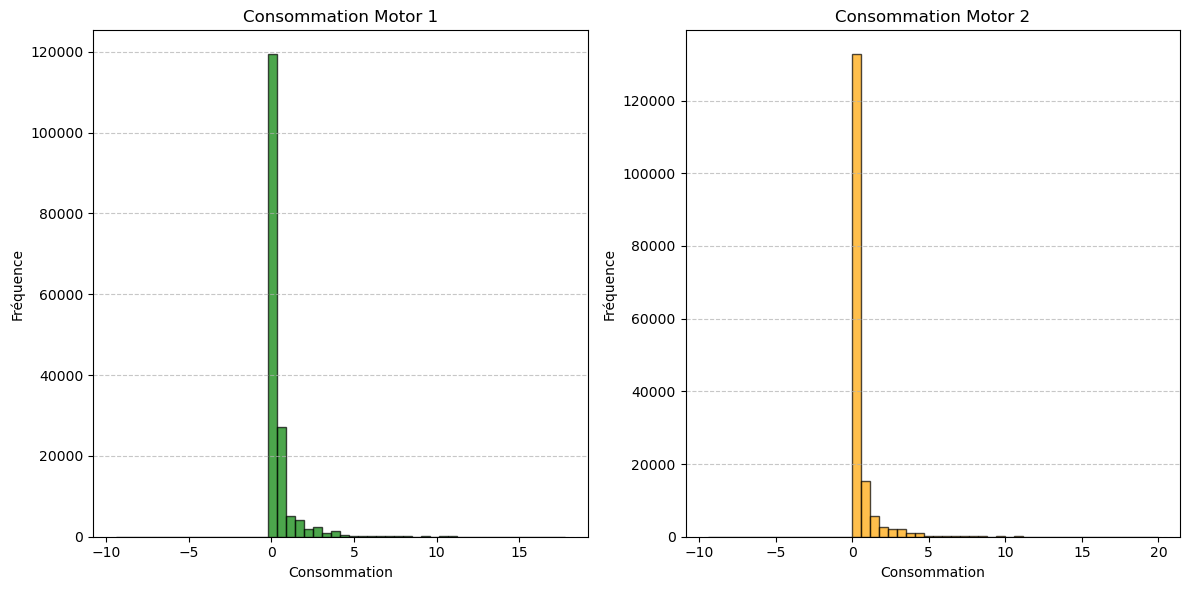

In [ ]:
# Conversion des colonnes "Motor 1" et "Motor 2" en valeurs numériques
motor1 = pd.to_numeric(conso['Motor 1'].str.replace(',', '.'), errors='coerce')
motor2 = pd.to_numeric(conso['Motor 2'].str.replace(',', '.'), errors='coerce')

plt.figure(figsize=(12, 6))

# Graphique Motor 1
plt.subplot(1, 2, 1)
plt.hist(motor1.dropna(), bins=50, color='green', edgecolor='black', alpha=0.7)
plt.title('Consommation Motor 1')
plt.xlabel('Consommation')
plt.ylabel('Fréquence')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Graphique Motor 2
plt.subplot(1, 2, 2)
plt.hist(motor2.dropna(), bins=50, color='orange', edgecolor='black', alpha=0.7)
plt.title('Consommation Motor 2')
plt.xlabel('Consommation')
plt.ylabel('Fréquence')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Distribution filtrée :
Speed : count   48017.000000
mean        3.588744
std         3.514154
min         1.000000
25%         1.300000
50%         2.200000
75%         5.100000
max        92.700000
Name: Speed, dtype: float64
Motor 1 : count   62997.000000
mean        1.043440
std         1.312608
min         0.196600
25%         0.332000
50%         0.564700
75%         1.191100
max        17.773300
Name: Motor 1, dtype: float64
Motor 2 : count   62167.000000
mean        1.071870
std         1.355321
min         0.195200
25%         0.317100
50%         0.571500
75%         1.211850
max        19.942200
Name: Motor 2, dtype: float64


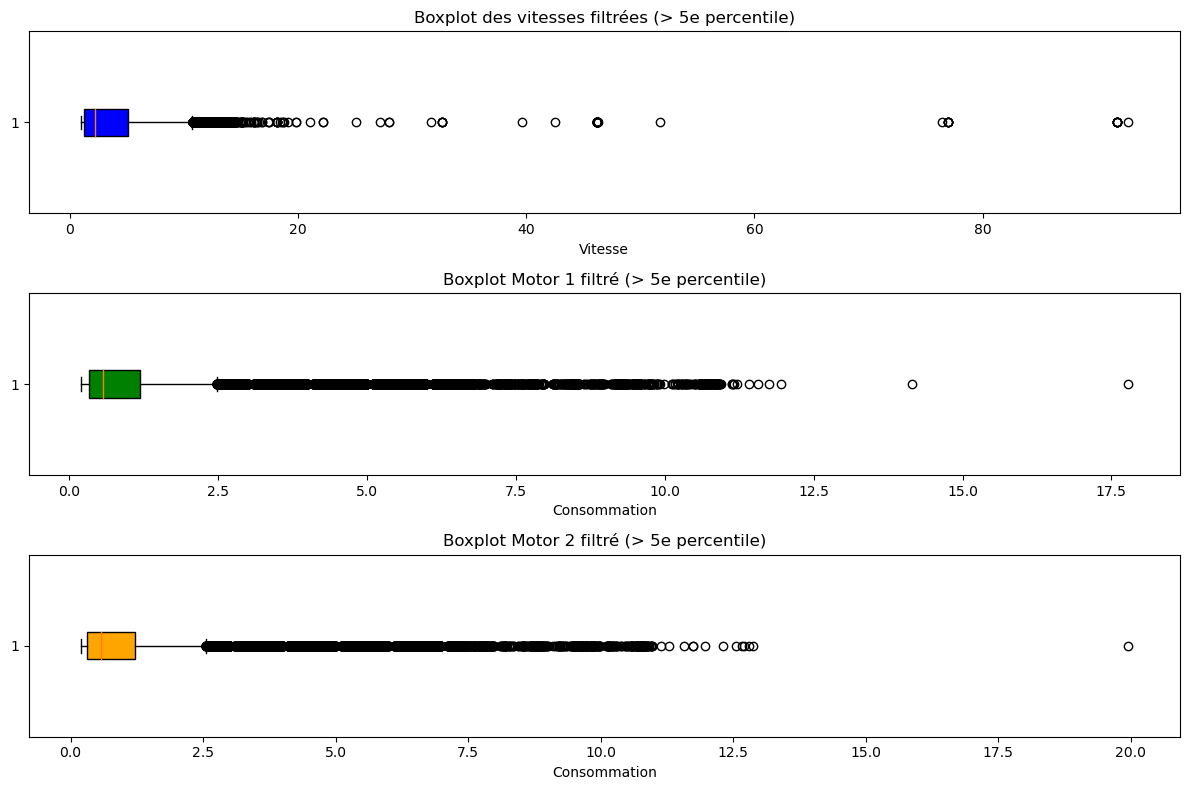

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Lecture du fichier CSV ===
conso = pd.read_csv("Conso.csv", sep=';', encoding='utf-8')

# === 2. Conversion des colonnes en numériques ===
cols_to_convert = ['Speed', 'Motor 1', 'Motor 2']
for col in cols_to_convert:
    conso[col] = (
        conso[col]
        .astype(str)
        .str.replace(',', '.', regex=False)   # virgule -> point
        .str.replace(' ', '', regex=False)    # suppression des espaces
    )
    conso[col] = pd.to_numeric(conso[col], errors='coerce')  # conversion en float

# === 3. Extraction et suppression des valeurs nulles ===
speed = conso['Speed'].dropna()
motor1 = conso['Motor 1'].dropna()
motor2 = conso['Motor 2'].dropna()

# Supprimer uniquement les zéros exacts
speed = speed[speed != 0.0]
motor1 = motor1[motor1 != 0.0]
motor2 = motor2[motor2 != 0.0]

# === 4. Filtrer les valeurs trop proches de zéro (5e percentile) ===
# Cela retire les valeurs les plus faibles pour rééquilibrer le boxplot
speed_filtered = speed[speed > speed.quantile(0.05)]
motor1_filtered = motor1[motor1 > motor1.quantile(0.05)]
motor2_filtered = motor2[motor2 > motor2.quantile(0.05)]

# === 5. Vérification des distributions ===
print("Distribution filtrée :")
print("Speed :", speed_filtered.describe())
print("Motor 1 :", motor1_filtered.describe())
print("Motor 2 :", motor2_filtered.describe())

# === 6. Tracé des boxplots ===
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.boxplot([speed_filtered], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.title('Boxplot des vitesses filtrées (> 5e percentile)')
plt.xlabel('Vitesse')

plt.subplot(3, 1, 2)
plt.boxplot([motor1_filtered], vert=False, patch_artist=True, boxprops=dict(facecolor='green', color='black'))
plt.title('Boxplot Motor 1 filtré (> 5e percentile)')
plt.xlabel('Consommation')

plt.subplot(3, 1, 3)
plt.boxplot([motor2_filtered], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='black'))
plt.title('Boxplot Motor 2 filtré (> 5e percentile)')
plt.xlabel('Consommation')

plt.tight_layout()
plt.show()


Distribution après suppression des anomalies :
Speed : count   49656.000000
mean        2.916272
std         2.374058
min         0.900000
25%         1.200000
50%         1.800000
75%         4.000000
max         9.900000
Name: Speed, dtype: float64
Motor 1 : count   58660.000000
mean        0.618791
std         0.469908
min         0.100000
25%         0.278600
50%         0.474450
75%         0.681900
max         2.356100
Name: Motor 1, dtype: float64
Motor 2 : count   57763.000000
mean        0.623672
std         0.486414
min         0.100000
25%         0.266200
50%         0.475500
75%         0.715400
max         2.430500
Name: Motor 2, dtype: float64


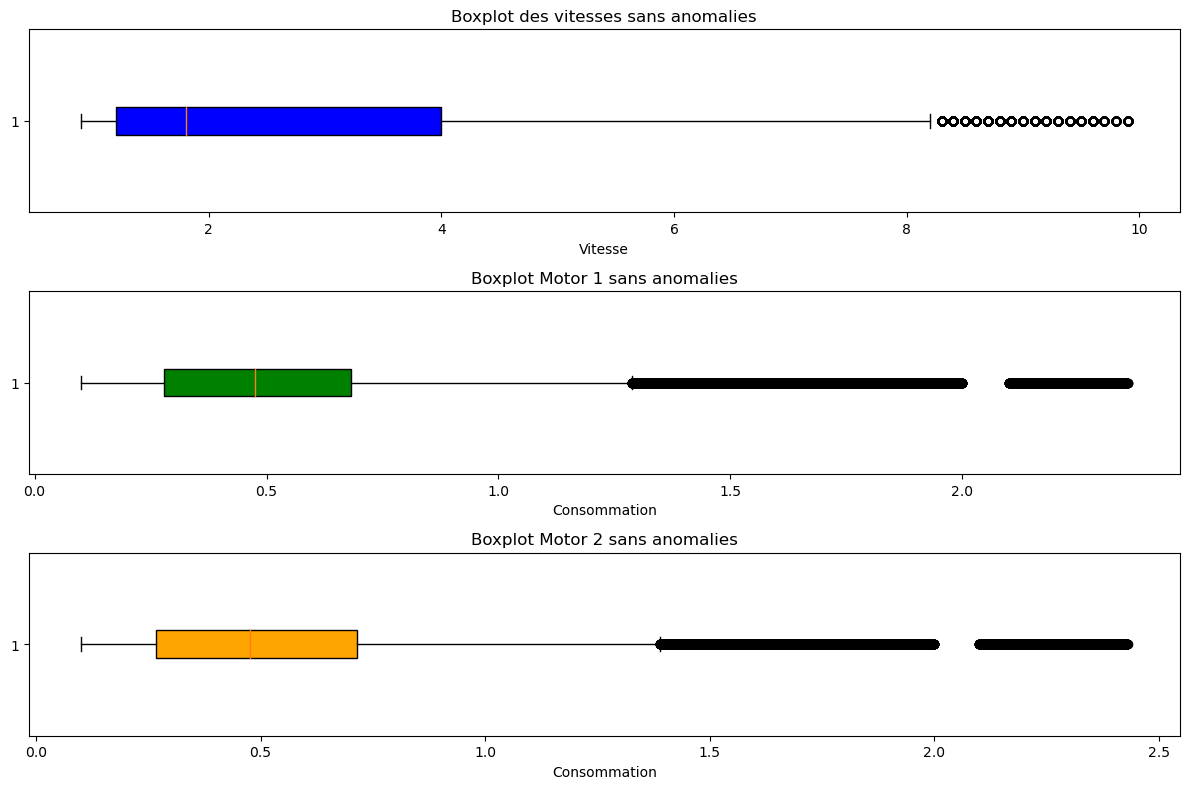

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Lecture du fichier CSV ===
conso = pd.read_csv("Conso.csv", sep=';', encoding='utf-8')

# === 2. Conversion des colonnes en numériques ===
cols_to_convert = ['Speed', 'Motor 1', 'Motor 2']
for col in cols_to_convert:
    conso[col] = (
        conso[col]
        .astype(str)
        .str.replace(',', '.', regex=False)   # virgule -> point
        .str.replace(' ', '', regex=False)    # suppression des espaces
    )
    conso[col] = pd.to_numeric(conso[col], errors='coerce')  # conversion en float

# === 3. Extraction et suppression des valeurs nulles ===
speed = conso['Speed'].dropna()
motor1 = conso['Motor 1'].dropna()
motor2 = conso['Motor 2'].dropna()

# Supprimer uniquement les zéros exacts
speed = speed[speed != 0.0]
motor1 = motor1[motor1 != 0.0]
motor2 = motor2[motor2 != 0.0]

# === 4. Fonction pour supprimer les valeurs aberrantes selon IQR ===
def remove_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return series[(series >= lower_bound) & (series <= upper_bound)]

# Application du nettoyage
speed_clean = remove_outliers(speed)
motor1_clean = remove_outliers(motor1)
motor2_clean = remove_outliers(motor2)

# === 5. Vérification des distributions ===
print("Distribution après suppression des anomalies :")
print("Speed :", speed_clean.describe())
print("Motor 1 :", motor1_clean.describe())
print("Motor 2 :", motor2_clean.describe())

# === 6. Tracé des boxplots ===
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.boxplot([speed_clean], vert=False, patch_artist=True, boxprops=dict(facecolor='blue', color='black'))
plt.title('Boxplot des vitesses sans anomalies')
plt.xlabel('Vitesse')

plt.subplot(3, 1, 2)
plt.boxplot([motor1_clean], vert=False, patch_artist=True, boxprops=dict(facecolor='green', color='black'))
plt.title('Boxplot Motor 1 sans anomalies')
plt.xlabel('Consommation')

plt.subplot(3, 1, 3)
plt.boxplot([motor2_clean], vert=False, patch_artist=True, boxprops=dict(facecolor='orange', color='black'))
plt.title('Boxplot Motor 2 sans anomalies')
plt.xlabel('Consommation')

plt.tight_layout()
plt.show()


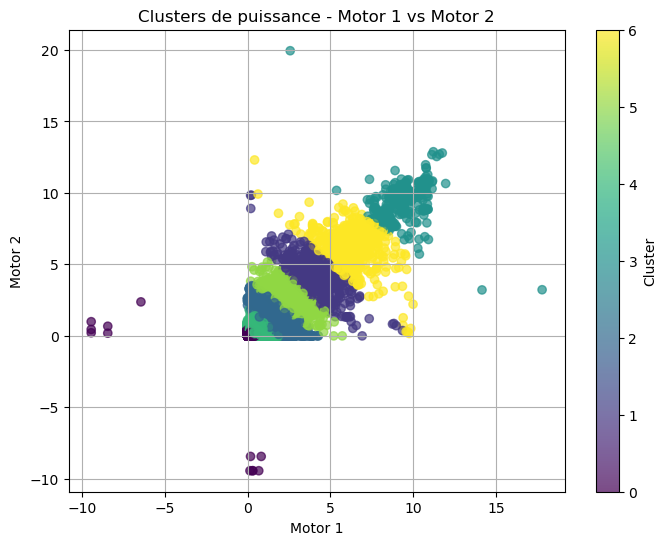

In [ ]:
from sklearn.cluster import KMeans

# Préparation des données
X = conso[['Motor 1', 'Motor 2']].dropna()

# Application du K-means (3 clusters par exemple)
kmeans = KMeans(n_clusters=7, random_state=0)
X['cluster'] = kmeans.fit_predict(X)

# Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X['Motor 1'], X['Motor 2'], c=X['cluster'], cmap='viridis', alpha=0.7)
plt.title('Clusters de puissance - Motor 1 vs Motor 2')
plt.xlabel('Motor 1')
plt.ylabel('Motor 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [ ]:
#Fonction poour recuperer la consommation total du moteur 1 et Moteur 2 a une date precise en entrant la date au format jj/mm/aaaa l'heure de depart et l'heure de fin au format hh:mm:ss
def consommation_totale(date, heure_debut, heure_fin):
    # Filtrer les données pour la date et l'intervalle horaire donnés
    masque_date = conso['RTC date'] == date
    masque_heure = (conso['RTC time'] >= heure_debut) & (conso['RTC time'] <= heure_fin)
    donnees_filtrees = conso[masque_date & masque_heure]
    
    # Calculer la consommation totale pour Motor 1 et Motor 2
    total_motor1 = donnees_filtrees['Motor 1'].sum()
    total_motor2 = donnees_filtrees['Motor 2'].sum()
    
    return total_motor1, total_motor2

In [ ]:
# --- Conversion des colonnes de date et heure ---
conso['RTC date'] = pd.to_datetime(conso['RTC date'], format='%d/%m/%Y', errors='coerce')
conso['RTC time'] = pd.to_timedelta(conso['RTC time'].astype(str), errors='coerce')

# --- Fonction pour récupérer la consommation totale sur un intervalle ---
def consommation_totale(date_str, heure_debut_str, heure_fin_str):
    # Conversion de la date et des heures
    date = pd.to_datetime(date_str, format='%d/%m/%Y', errors='coerce')
    heure_debut = pd.to_timedelta(heure_debut_str)
    heure_fin = pd.to_timedelta(heure_fin_str)

    # Filtrage des données pour la date et l'intervalle horaire
    masque_date = conso['RTC date'] == date
    masque_heure = (conso['RTC time'] >= heure_debut) & (conso['RTC time'] <= heure_fin)
    donnees_filtrees = conso.loc[masque_date & masque_heure]

    # Somme des consommations pour Motor 1 et Motor 2
    total_motor1 = donnees_filtrees['Motor 1'].sum()
    total_motor2 = donnees_filtrees['Motor 2'].sum()

    return total_motor1, total_motor2

# --- Application de la fonction à chaque job ---
assi['Consommation Motor 1'] = 0.0
assi['Consommation Motor 2'] = 0.0

for index, row in assi.iterrows():
    job_start = row['Start Job']
    job_end = row['End Job']

    date_str = job_start.strftime('%d/%m/%Y')
    heure_debut_str = job_start.strftime('%H:%M:%S')
    heure_fin_str = job_end.strftime('%H:%M:%S')

    total_m1, total_m2 = consommation_totale(date_str, heure_debut_str, heure_fin_str)

    assi.at[index, 'Consommation Motor 1'] = total_m1
    assi.at[index, 'Consommation Motor 2'] = total_m2

# --- Calcul de la consommation totale par job ---
assi['Consommation Totale'] = assi['Consommation Motor 1'] + assi['Consommation Motor 2']

# --- Regroupement par type de job pour obtenir la consommation moyenne ---
consommation_moyenne_par_job = assi.groupby('Job')['Consommation Totale'].mean().reset_index()

# --- Affichage des résultats ---
print("Consommation moyenne par type de job :")
print(consommation_moyenne_par_job)

# --- Optionnel : moyenne par moteur séparément ---
moyenne_par_moteur = assi.groupby('Job')[['Consommation Motor 1', 'Consommation Motor 2']].mean().reset_index()
print("\nMoyenne par moteur et par job :")
print(moyenne_par_moteur)


Consommation moyenne par type de job :
                    Job  Consommation Totale
0             FIREWATCH           244.000639
1                  LOCK            55.968122
2             LOCK ONLY            18.008241
3     SHIFT ACHTERHAVEN            19.791982
4  SHIFT VOOR-ACHTERHVN             0.000000
5       SHIFT VOORHAVEN            67.870649
6             VOORHAVEN            35.987156

Moyenne par moteur et par job :
                    Job  Consommation Motor 1  Consommation Motor 2
0             FIREWATCH            120.905756            123.094883
1                  LOCK             27.911866             28.056257
2             LOCK ONLY              8.991258              9.016983
3     SHIFT ACHTERHAVEN             10.000567              9.791415
4  SHIFT VOOR-ACHTERHVN              0.000000              0.000000
5       SHIFT VOORHAVEN             31.480099             36.390550
6             VOORHAVEN             17.708765             18.278392


In [ ]:
import re
import pandas as pd
from geopy.distance import geodesic



print(conso['Latitude'].head())
print(conso['Longitude'].head())

# --- Fonction adaptée à ton format ---
def convert_to_decimal(coord):
    if pd.isna(coord):
        return None
    coord = str(coord).strip()

    # Correspond à des formats comme :
    # 47°52'14.874"N  ou  0003°35'24.06"W
    match = re.match(r"0*(\d{1,3})°(\d{1,2})'(\d+(?:\.\d+)?)\"?([NSEW])", coord)
    if not match:
        return None

    degrees, minutes, seconds, direction = match.groups()
    decimal = float(degrees) + float(minutes)/60 + float(seconds)/3600
    if direction in ['S', 'W']:
        decimal = -decimal
    return decimal

# Exemple : application sur ton DataFrame
# (adapte la lecture à ton fichier CSV)
# conso = pd.read_csv('ton_fichier.csv', sep=';')

conso['Latitude'] = conso['Latitude'].apply(convert_to_decimal)
conso['Longitude'] = conso['Longitude'].apply(convert_to_decimal)

# Supprimer les lignes invalides
conso = conso.dropna(subset=['Latitude', 'Longitude']).reset_index(drop=True)

# Calculer les distances successives
def safe_distance(idx):
    if idx == 0:
        return 0
    coord1 = (conso.loc[idx-1, 'Latitude'], conso.loc[idx-1, 'Longitude'])
    coord2 = (conso.loc[idx, 'Latitude'], conso.loc[idx, 'Longitude'])
    return geodesic(coord1, coord2).kilometers

conso['Distance'] = [safe_distance(i) for i in range(len(conso))]

# Calcul des consommations
conso['Consommation Motor 1 par km'] = conso['Motor 1'] / conso['Distance'].replace(0, float('nan'))
conso['Consommation Motor 2 par km'] = conso['Motor 2'] / conso['Distance'].replace(0, float('nan'))

# Nettoyage final
conso.replace([float('inf'), -float('inf')], 0, inplace=True)
conso.fillna(0, inplace=True)

print(conso[['RTC date', 'RTC time', 'Distance', 'Consommation Motor 1 par km', 'Consommation Motor 2 par km']])


Empty DataFrame
Columns: [RTC date, RTC time, Distance, Consommation Motor 1 par km, Consommation Motor 2 par km]
Index: []
